#Assignment 2

This assignment is focussed on weights initialization and how it affects the training and testing of a neural network.

In [2]:
'''
Author: Mantha Sai Gopal
Reg.no: 23358
'''

# Importing necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision.transforms import *

In [3]:
# Function to plot the histogram of given activations

def plotActivations(activations, title):
    num_subplots = len(activations)

    fig, axes = plt.subplots(2, 3, figsize=(10, 5))
    axes = axes.flatten()

    for i in range(3):
        data = activations[i].detach().numpy()
        axes[i].hist(data[0], bins=30, edgecolor='black')
        if i == 0:
          axes[i].set_title(f'Input Layer')
        else:
          axes[i].set_title(f'Layer {i}')

    if num_subplots == 5:
        for i in range(3, 5):
            data = activations[i].detach().numpy()
            if(i == 4):
              axes[i].hist(data[0], bins=10, edgecolor='black')
              axes[i].set_title(f'Layer {i}')
            else:
              axes[i].hist(data[0], bins=30, edgecolor='black')
              axes[i].set_title(f'Layer {i}')


    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.suptitle(title, y=1.05)

    plt.show()

### 1. Consider a neural network with 4 layers of 500 neurons each. Initialize the weights of each of these layers to samples from Gaussian with mean 0 and standard deviation 0.01. The i/p layer consists of 1000 features randomly sampled from the standard Gaussian. Do only the forward propagation once of the input with tanh as the activation function in all the layers. At the end of forward propagation, plot layer-wise (including input layer) histogram of activation values. What do you observe?

In [4]:
# Defining a simple neural network using nn.Module
class NeuralNetwork(nn.Module):
  def __init__(self, activation_function, standard_deviation):
    super().__init__()
    self.activation_function = activation_function
    self.standard_deviation = standard_deviation

    self.Layer1 = nn.Linear(1000,500)
    nn.init.normal_(self.Layer1.weight, mean=0, std=standard_deviation)

    self.Layer2 = nn.Linear(500,500)
    nn.init.normal_(self.Layer2.weight, mean=0, std=standard_deviation)

    self.Layer3 = nn.Linear(500,500)
    nn.init.normal_(self.Layer3.weight, mean=0, std=standard_deviation)

    self.Layer4 = nn.Linear(500,10)
    nn.init.normal_(self.Layer4.weight, mean=0, std=standard_deviation)


    self.linear_tanh_stack = nn.Sequential(
        self.Layer1,
        activation_function,
        self.Layer2,
        activation_function,
        self.Layer3,
        activation_function,
        self.Layer4,
        activation_function
    )

  def forward(self, x):
    # Create a list to store activations at e layer
    activations = [x]

    for layer in self.linear_tanh_stack:
      x = layer(x)

      if type(layer) == type(self.activation_function):
        activations.append(x)
        logits = x

    return activations

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.
activation_function = nn.Tanh()
model = NeuralNetwork(activation_function, 0.01)

activations = model(x)

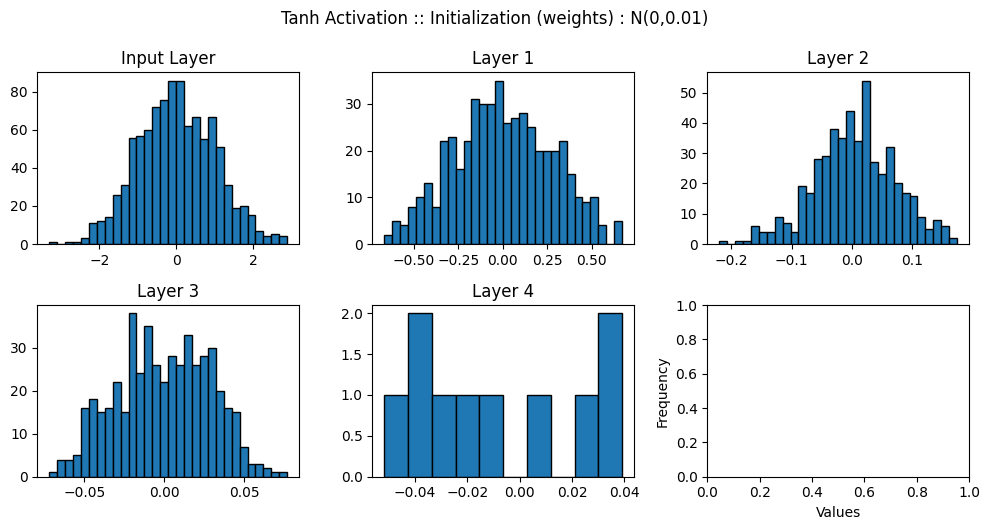

In [ ]:
plotActivations(activations, 'Tanh Activation :: Initialization (weights) : N(0,0.01)')

Observations:

The values in the input layer clearly follow normal distribution as expected(as we initialized it that way). Across the layers, we observe that the activation values still follow normal distribution(as seen from images) but the variance is getting smaller - The activation values across layers are becoming smaller and are clustered around 0. Initially, they spanned a range [-2,2] then [-0.5,0.5], [-0.2,0.2], [-0.05,0.05] and [-0.04,0.04]. This behaviour can be attributed to the activation function used(tanh). Since the weights are small and the activation function further makes the values given to it as input even smaller.

Note:  

1. Some of the activations are positive while some are negative owing to the nature of tanh function.
2. With such initializaton, when we now perform gradient computation and subsequently back propagation, we observe vanishing gradient effect.

### 2. Repeat the above experiment for sigmoid activation. What do you observe?

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.Sigmoid()
model = NeuralNetwork(activation_function, 0.01)

activations = model(x)

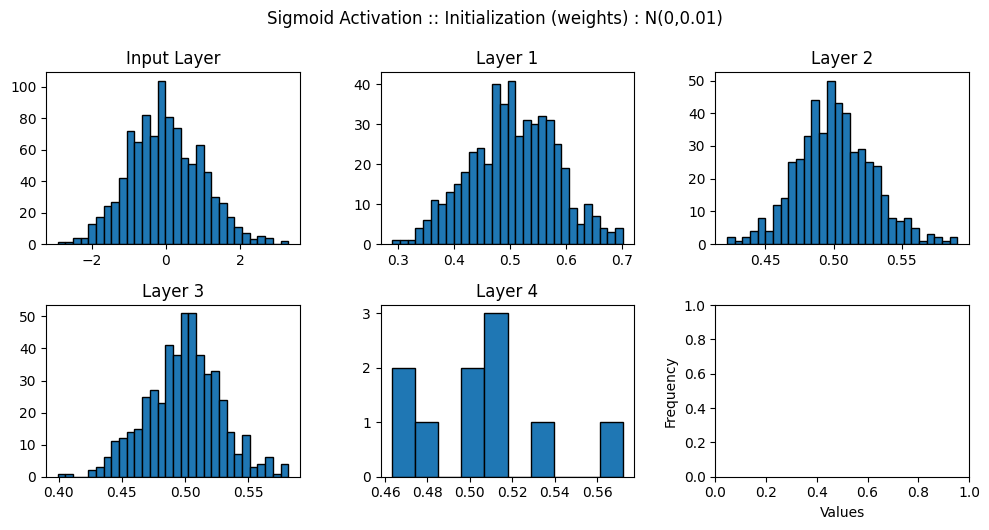

In [ ]:
plotActivations(activations, 'Sigmoid Activation :: Initialization (weights) : N(0,0.01)')

Observations:

Firstly, we observe that all the activations are non-negative, for the reason that the range of the sigmoid function is non-negative. Except for this difference, we observe similar behaviour as in the case of using tanh activation. In addition, we see in the histograms above peak at the value 0.5(in case of tanh it was at 0). The reason is that the values closer to 0 are mapped to values closer to 0.5 by sigmoid function.

###3. Repeat the above experiment for ReLU activation. What do you observe?

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.ReLU()
model = NeuralNetwork(activation_function, 0.01)

activations = model(x)

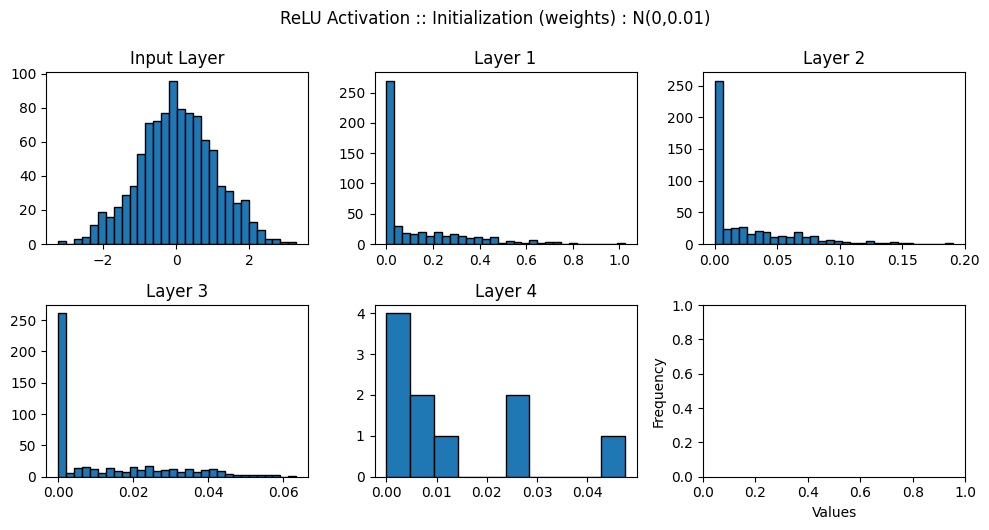

In [ ]:
plotActivations(activations, 'ReLU Activation :: Initialization (weights) : N(0,0.01)')

Observations:

ReLU(x) := max(0,x). From this definition, one can deduce that all the negative activations are "zeroed out" under this activation. As a consequence, we see peaks at 0 in all the histograms above. Also we note that the range of values across layers is also getting smaller. The reason for this beahaviour is initialization with small weights.

###4. Repeat the above experiment again for tanh, sigmoid and ReLU, but now with weights initialized to samples from standard Gaussian. What do you observe?

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.Tanh()
model = NeuralNetwork(activation_function, 1)

activations = model(x)

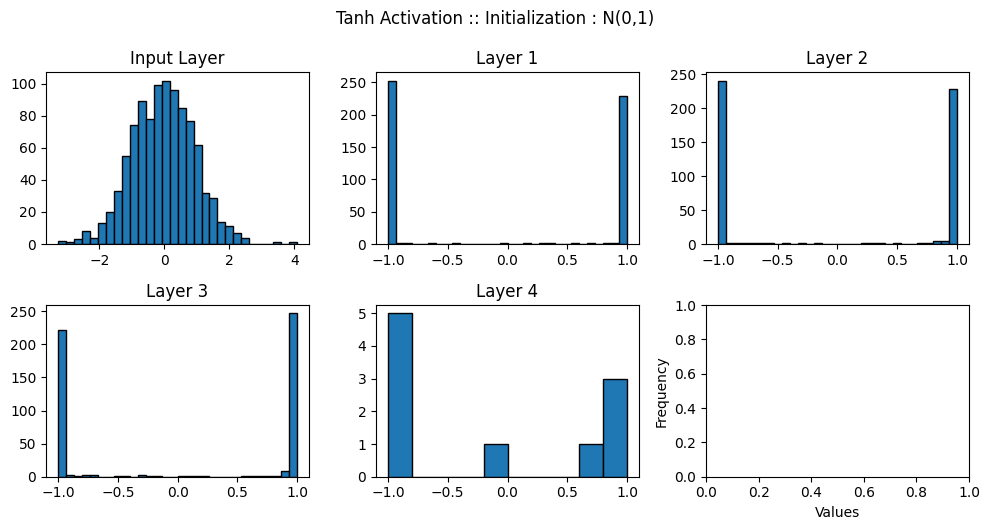

In [ ]:
plotActivations(activations, 'Tanh Activation :: Initialization : N(0,1)')

Observations:

The histograms peak at both -1 and 1. We have increased the std deviation from 0.01 to 1. This implies that weights can now be sampled from a larger range around 0. Therefore positive weights are relatively larger while the negative weights are relatively smaller and tanh saturates large positive values to 1 and very small negative values to -1.

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.Sigmoid()
model = NeuralNetwork(activation_function, 1)

activations = model(x)

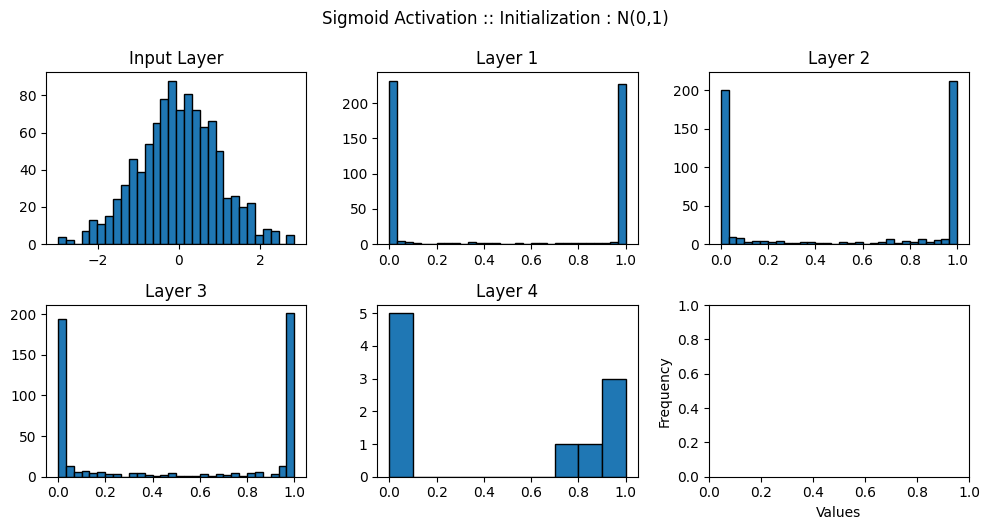

In [ ]:
plotActivations(activations, 'Sigmoid Activation :: Initialization : N(0,1)')

Observations:

The histograms peak at both 0 and 1. The reason for this remains same as the explanation provided above except that the large positive values and the small negative values are mapped to 1 and 0 respectively by sigmoid function.

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.ReLU()
model = NeuralNetwork(activation_function, 1)

activations = model(x)

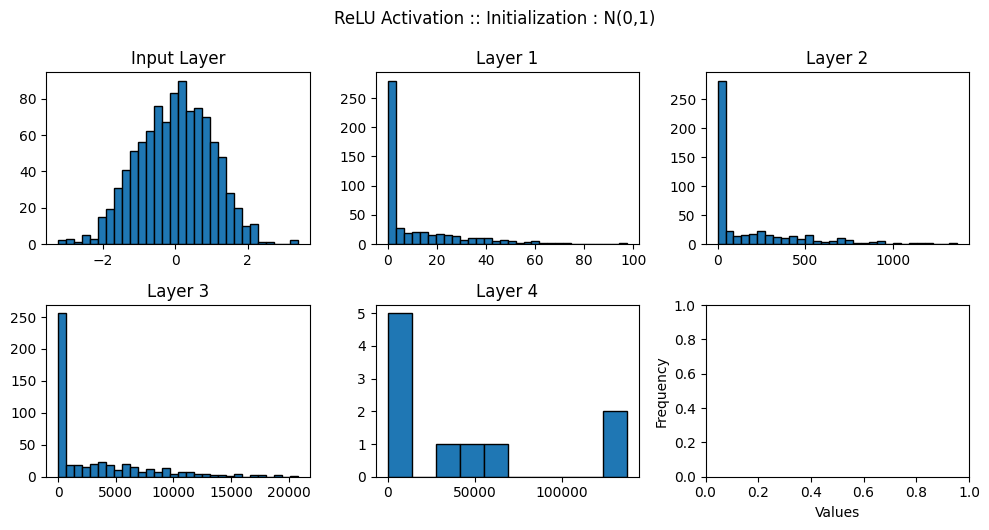

In [ ]:
plotActivations(activations, 'ReLU Activation :: Initialization : N(0,1)')

Observations:

ReLU(x) := max(0,x). From this definition, one can deduce that all the negative activations are "zeroed out" under this activation. As a consequence, we see peaks at 0 in all the histograms above. But we observe that range of activations is getting larger at every layer. This can be attributed to initialization with larger weights.

###5. Now repeat the above experiment with Xavier Weight Initialization on all the 3 activations. What do you observe?

In [ ]:
# Defining a simple neural network using nn.Module
class NeuralNetwork(nn.Module):
  def __init__(self, activation_function):
    super().__init__()
    self.activation_function = activation_function

    self.Layer1 = nn.Linear(1000,500)
    nn.init.xavier_normal_(self.Layer1.weight, gain=1.0)

    self.Layer2 = nn.Linear(500,500)
    nn.init.xavier_normal_(self.Layer2.weight, gain=1.0)

    self.Layer3 = nn.Linear(500,500)
    nn.init.xavier_normal_(self.Layer3.weight, gain=1.0)

    self.Layer4 = nn.Linear(500,10)
    nn.init.xavier_normal_(self.Layer4.weight, gain=1.0)



    self.linear_tanh_stack = nn.Sequential(
        self.Layer1,
        activation_function,
        self.Layer2,
        activation_function,
        self.Layer3,
        activation_function,
        self.Layer4,
        activation_function
    )

  def forward(self, x):
    # Create a list to store activation values at each layer
    activations = [x]

    for layer in self.linear_tanh_stack:
      x = layer(x)

      if type(layer) == type(self.activation_function):
        activations.append(x)
        logits = x

    return activations

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.Tanh()
model = NeuralNetwork(activation_function)

activations = model(x)

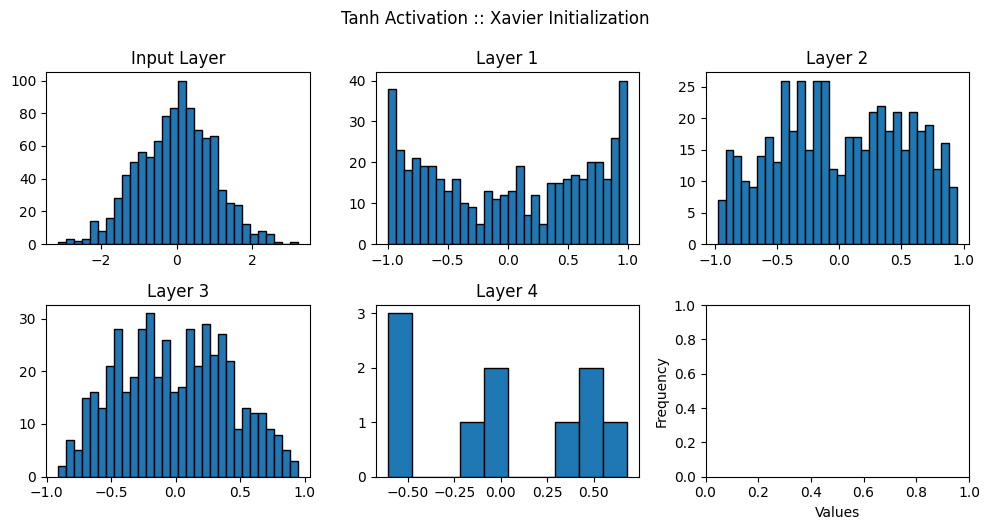

In [ ]:
plotActivations(activations, 'Tanh Activation :: Xavier Initialization')

Xavier Initialization:

The weights are initialized with values sampled from the Normal dist. with mean 0 and std.deviation, $$ \text{gain} \cdot \sqrt \frac{2}{{\text{fan_in}} + \text{fan_out}} $$

The goal of this initialization is to ensure that the variance of activations across layers remains roughly constant based on the fan_in and fan_out parameters.

Observations:

The variance of activations across layers remains almost same across layers i.e., the activations across layers lie in the range $[-1, 1]$ In the first layer the activations peak at -1 and 1, and in layer 2 and 3 we see that the distribution tends to become like normal.

<ipython-input-19-0e97e491afac>:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  x = torch.nn.init.normal(x, mean=0.0, std =1)


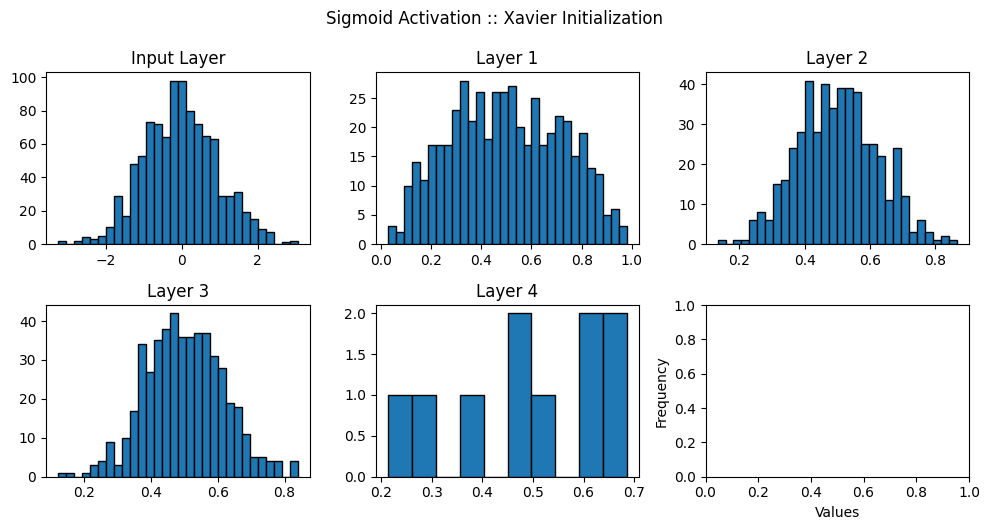

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.Sigmoid()
model = NeuralNetwork(activation_function)

activations = model(x)
plotActivations(activations, 'Sigmoid Activation :: Xavier Initialization')

Observations:

The range of activations is roughly constant and the histograms resemble normal dist.

<ipython-input-20-3f53370a5c8e>:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  x = torch.nn.init.normal(x, mean=0.0, std =1)


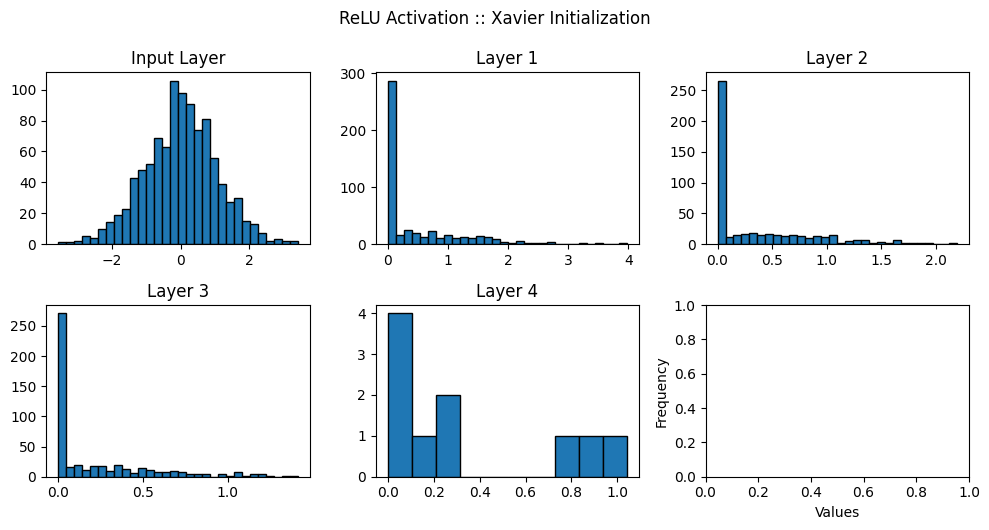

In [ ]:
# Create input tensor
x = torch.randn(1, 1000) # Initializing the input with values sampled from std normal dist.

activation_function = nn.ReLU()
model = NeuralNetwork(activation_function)

activations = model(x)
plotActivations(activations, 'ReLU Activation :: Xavier Initialization')

Observations:

Similar behaviour as seen in the case where weights were sampled from $N(0,0.01)$. The range of activations is not constant or in other words is significantly changing across layers. He initialization helps to achieve this especially for the ReLU activation function.

###6. Now repeat the above experiment with He Weight Initialization on all the 3 activations. What do you observe?

In [ ]:
# Defining a simple neural network using nn.Module
class NeuralNetwork(nn.Module):
  def __init__(self, activation_function):
    super().__init__()
    self.activation_function = activation_function

    self.Layer1 = nn.Linear(1000,500)
    nn.init.kaiming_uniform_(self.Layer1.weight, mode='fan_in', nonlinearity='relu')

    self.Layer2 = nn.Linear(500,500)
    nn.init.kaiming_uniform_(self.Layer2.weight, mode='fan_in', nonlinearity='relu')

    self.Layer3 = nn.Linear(500,500)
    nn.init.kaiming_uniform_(self.Layer3.weight, mode='fan_in', nonlinearity='relu')

    self.Layer4 = nn.Linear(500,10)
    nn.init.kaiming_uniform_(self.Layer4.weight, mode='fan_in', nonlinearity='relu')



    self.linear_tanh_stack = nn.Sequential(
        self.Layer1,
        activation_function,
        self.Layer2,
        activation_function,
        self.Layer3,
        activation_function,
        self.Layer4,
        activation_function
    )

  def forward(self, x):
    # Create a list to store activation values at each layer
    activations = [x]

    for layer in self.linear_tanh_stack:
      x = layer(x)

      if type(layer) == type(self.activation_function):
        activations.append(x)
        logits = x

    return activations

<ipython-input-22-819510849de1>:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  x = torch.nn.init.normal(x, mean=0.0, std =1)


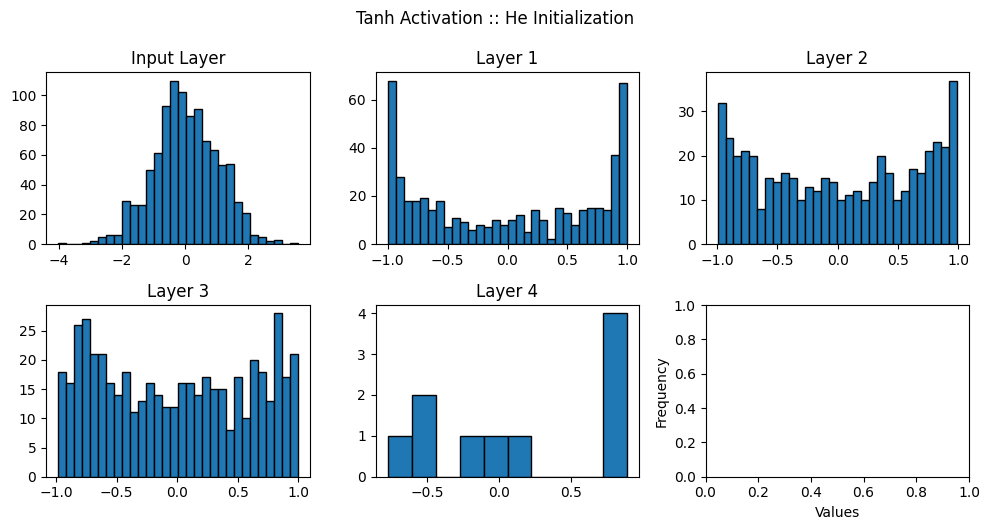

In [ ]:
# Create input tensor
x = torch.zeros(1,1000)
x = torch.nn.init.normal(x, mean=0.0, std =1)

activation_function = nn.Tanh()
model = NeuralNetwork(activation_function)

activations = model(x)
plotActivations(activations, 'Tanh Activation :: He Initialization')

Observations:

The range of activation values (signifies variance) remains roughly constant across layers. Also the values peak at -1 and 1 in layers 1 and 2 because of the behaviour of tanh function.

<ipython-input-23-bac52be166f8>:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  x = torch.nn.init.normal(x, mean=0.0, std =1)


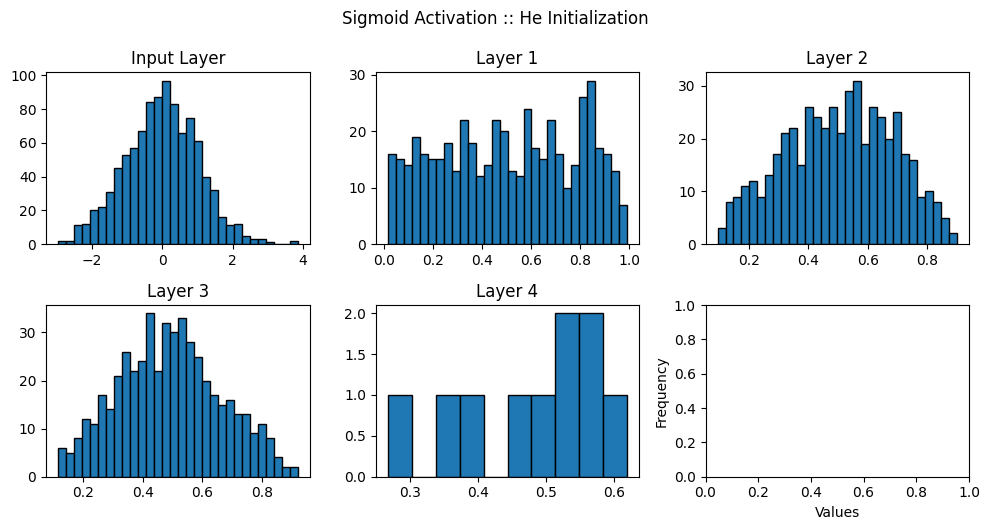

In [ ]:
# Create input tensor
x = torch.zeros(1,1000)
x = torch.nn.init.normal(x, mean=0.0, std =1)

activation_function = nn.Sigmoid()
model = NeuralNetwork(activation_function)

activations = model(x)
plotActivations(activations, 'Sigmoid Activation :: He Initialization')

Observations:

The range of activation values (signifies variance) remains roughly constant across layers. The histograms resemble normal dist.

<ipython-input-24-4be7fc66293a>:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  x = torch.nn.init.normal(x, mean=0.0, std =1)


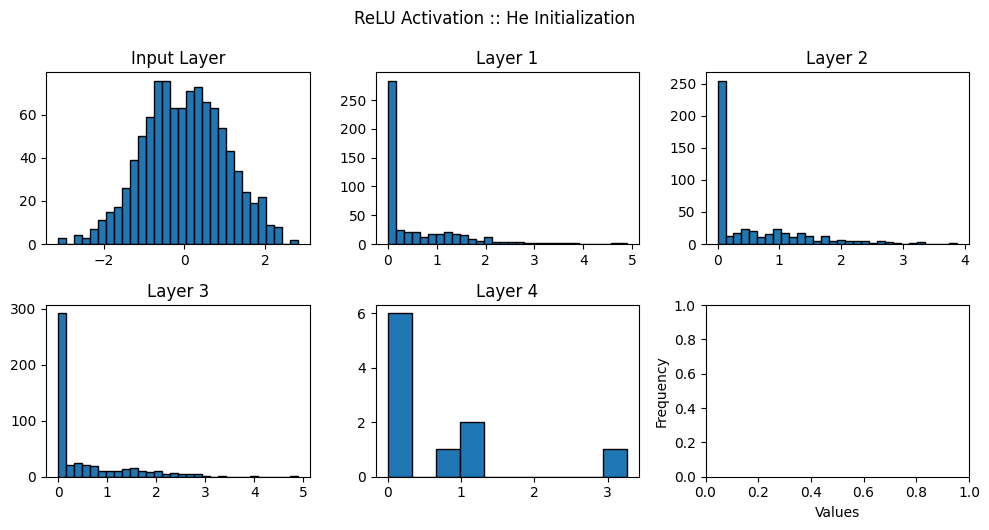

In [ ]:
# Create input tensor
x = torch.zeros(1,1000)
x = torch.nn.init.normal(x, mean=0.0, std =1)

activation_function = nn.ReLU()
model = NeuralNetwork(activation_function)

activations = model(x)
plotActivations(activations, 'ReLU Activation :: He Initialization')

Observations:

The range($[0,3]$) of activation values remains almost same across layers. This behaviour in particular could not be achieved when we initialized weights sampled from $N(0,1)$ and also

### 7. In the first lab assignment, use ReLU activation (in the hidden layers) and He weight initialization and train the model. Does the model train faster? Does it perform better on valid/test set?

In [5]:
# code from first assignment

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.models as models

# downloading the train dataset(FashionMNIST)
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True, # downloads the data if it is not persent already
    transform = ToTensor() # converts the data into PyTorch tensor
)

# downloading the test dataset
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

# creating dataloader for train and test data with batch size as 256
train_dataloader = DataLoader(training_data, batch_size=256, shuffle=True) # is an iterable
test_dataloader = DataLoader(test_data, batch_size=256, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 16440309.46it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 298924.70it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5409836.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12976128.00it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
# defining the train loop
def train_loop(dataloader, model, loss_fn, optimizer):
  model.train()
  size = len(dataloader.dataset)

  correct = 0
  for batch, (X,y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)  # compute loss
    correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Back Propagation
    loss.backward()
    optimizer.step() # optimizer updates the model parameters based on the gradients computed previously
    optimizer.zero_grad() # zero-out the gradients for the next iteration

    # print some of the losses
    if batch % 100 == 0:
      loss = loss.item()
      current = (batch + 1 ) * len(X) # current defines the number of images processed so far
      print(f"Loss: {loss:>7f}  Processed: {current} / {size}")
  correct /= size
  print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%\n")
  return 100 * correct

# defining test loop
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
  return 100 * correct

In [17]:
# Defining a simple neural network using nn.Module
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten() # used to convert the image to a vector to pass to the model

    self.Layer1 = nn.Linear(28*28,64)
    nn.init.kaiming_normal_(self.Layer1.weight, mode='fan_in', nonlinearity='relu')

    self.Layer2 = nn.Linear(64,128)
    nn.init.kaiming_normal_(self.Layer2.weight, mode='fan_in', nonlinearity='relu')

    self.Layer3 = nn.Linear(128,10)
    nn.init.kaiming_normal_(self.Layer3.weight, mode='fan_in', nonlinearity='relu')

    self.linear_relu_stack = nn.Sequential(
        self.Layer1,
        nn.ReLU(),
        self.Layer2,
        nn.ReLU(),
        self.Layer3,
    )

  # Forward Propagation
  def forward(self, x):
    # flatten the input image
    x = self.flatten(x)

    # pass the resultant vector through linear_relu_stack
    logits = self.linear_relu_stack(x)
    return logits

# create an instance of NeuralNetwork
model = NeuralNetwork()

In [18]:
learning_rate = 1e-1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 20
n_train_acc = []
n_test_acc = []

for t in range(epochs):
    print(f"Epoch {t+1}\n========================================")
    n_train_acc.append(train_loop(train_dataloader, model, loss_fn, optimizer))
    n_test_acc.append(test_loop(test_dataloader, model, loss_fn))
print("Done!")
print(n_train_acc)
print(n_test_acc)

Epoch 1
Loss: 2.442898  Processed: 256 / 60000
Loss: 0.671737  Processed: 25856 / 60000
Loss: 0.609751  Processed: 51456 / 60000
Train Error: 
 Accuracy: 73.7%

Test Error: 
 Accuracy: 75.0%, Avg loss: 0.682650 

Epoch 2
Loss: 0.757698  Processed: 256 / 60000
Loss: 0.575036  Processed: 25856 / 60000
Loss: 0.506590  Processed: 51456 / 60000
Train Error: 
 Accuracy: 82.2%

Test Error: 
 Accuracy: 82.8%, Avg loss: 0.487676 

Epoch 3
Loss: 0.413797  Processed: 256 / 60000
Loss: 0.414080  Processed: 25856 / 60000
Loss: 0.512974  Processed: 51456 / 60000
Train Error: 
 Accuracy: 84.2%

Test Error: 
 Accuracy: 82.8%, Avg loss: 0.462346 

Epoch 4
Loss: 0.396534  Processed: 256 / 60000
Loss: 0.403903  Processed: 25856 / 60000
Loss: 0.385270  Processed: 51456 / 60000
Train Error: 
 Accuracy: 85.2%

Test Error: 
 Accuracy: 84.6%, Avg loss: 0.423002 

Epoch 5
Loss: 0.410693  Processed: 256 / 60000
Loss: 0.337016  Processed: 25856 / 60000
Loss: 0.291711  Processed: 51456 / 60000
Train Error: 
 Accu

In [8]:
# original model's train and test accuracies

m_train_acc = [64.545, 78.98166666666665, 81.69999999999999, 83.28166666666667, 84.32333333333332, 84.895, 85.51833333333333, 85.80166666666666, 86.36666666666667, 86.8, 87.00166666666667, 87.23666666666666, 87.48, 87.805, 87.87, 87.91, 88.28666666666666, 88.495, 88.44999999999999, 88.665]
m_test_acc = [74.03999999999999, 76.95, 82.55, 82.57, 84.07, 82.13000000000001, 84.98, 83.94, 82.71, 84.89, 85.00999999999999, 83.89, 83.77, 85.94000000000001, 85.07000000000001, 84.11, 85.66, 85.33, 86.48, 86.11]


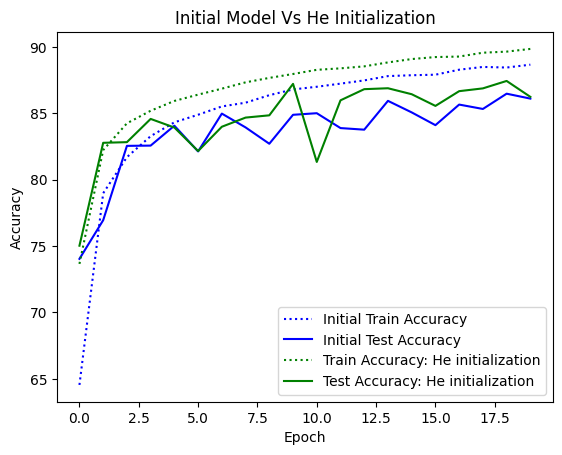

In [19]:
# Plot m_train_acc and m_test_acc with the same color (blue)
plt.plot(m_train_acc, linestyle=':', color='blue', label='Initial Train Accuracy')
plt.plot(m_test_acc, linestyle='-', color='blue', label='Initial Test Accuracy')

# Plot n_train_acc and n_test_acc with the same color (green)
plt.plot(n_train_acc, linestyle=':', color='green', label='Train Accuracy: He initialization')
plt.plot(n_test_acc, linestyle='-', color='green', label='Test Accuracy: He initialization')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Initial Model Vs He Initialization')
plt.legend()

plt.show()

In [21]:
print(max(m_train_acc))
print(max(n_train_acc))
print(max(m_test_acc))
print(max(n_test_acc))

88.665
89.85166666666666
86.48
87.44


Observations:

From the above plots, we conclude that the training is faster after employing He initialization. With He initialization, the model kicks off with about 75% accuracy which is significantly larger than the initial model's train accuracy(~ 65%) in the first epoch. Also at any epoch the train accuracy of the model with He initalized weights is higher than that of initial model.

Using He initialization also provided better results on test set as well. The new test accuracy being 87.44% while the old one being 86.48%.

### 8. In the first lab assignment, use ReLU activation (in the hidden layers) but allow the weights to be automatically initialized by pytorch linear module. Add batch normalization layer after every application of ReLU and train the model. Does the model train faster? Does it perform better on valid/test set? Compare the results with results from experiment 7.

In [9]:
# Defining a simple neural network using nn.Module
class BNNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten() # used to convert the image to a vector to pass to the model
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,64),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.BatchNorm1d(128),
        nn.Linear(128,10)
    )

  # Forward Propagation
  def forward(self, x):
    # flatten the input image
    x = self.flatten(x)

    # pass the resultant vector through linear_relu_stack
    logits = self.linear_relu_stack(x)
    return logits

# create an instance of NeuralNetwork
BNmodel = BNNeuralNetwork()

In [10]:
learning_rate = 1e-1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(BNmodel.parameters(), lr=learning_rate)

epochs = 20
bn_train_acc = []
bn_test_acc = []

for t in range(epochs):
    print(f"Epoch {t+1}\n========================================")
    bn_train_acc.append(train_loop(train_dataloader, BNmodel, loss_fn, optimizer))
    bn_test_acc.append(test_loop(test_dataloader, BNmodel, loss_fn))
print("Done!")
print(bn_train_acc)
print(bn_test_acc)

Epoch 1
Loss: 2.355288  Processed: 256 / 60000
Loss: 0.459461  Processed: 25856 / 60000
Loss: 0.382269  Processed: 51456 / 60000
Train Error: 
 Accuracy: 82.7%

Test Error: 
 Accuracy: 83.0%, Avg loss: 0.485476 

Epoch 2
Loss: 0.437538  Processed: 256 / 60000
Loss: 0.408716  Processed: 25856 / 60000
Loss: 0.350295  Processed: 51456 / 60000
Train Error: 
 Accuracy: 86.4%

Test Error: 
 Accuracy: 84.8%, Avg loss: 0.434020 

Epoch 3
Loss: 0.267809  Processed: 256 / 60000
Loss: 0.361607  Processed: 25856 / 60000
Loss: 0.392629  Processed: 51456 / 60000
Train Error: 
 Accuracy: 87.6%

Test Error: 
 Accuracy: 85.0%, Avg loss: 0.422515 

Epoch 4
Loss: 0.370234  Processed: 256 / 60000
Loss: 0.353015  Processed: 25856 / 60000
Loss: 0.359322  Processed: 51456 / 60000
Train Error: 
 Accuracy: 88.2%

Test Error: 
 Accuracy: 85.7%, Avg loss: 0.394072 

Epoch 5
Loss: 0.286399  Processed: 256 / 60000
Loss: 0.302326  Processed: 25856 / 60000
Loss: 0.262527  Processed: 51456 / 60000
Train Error: 
 Accu

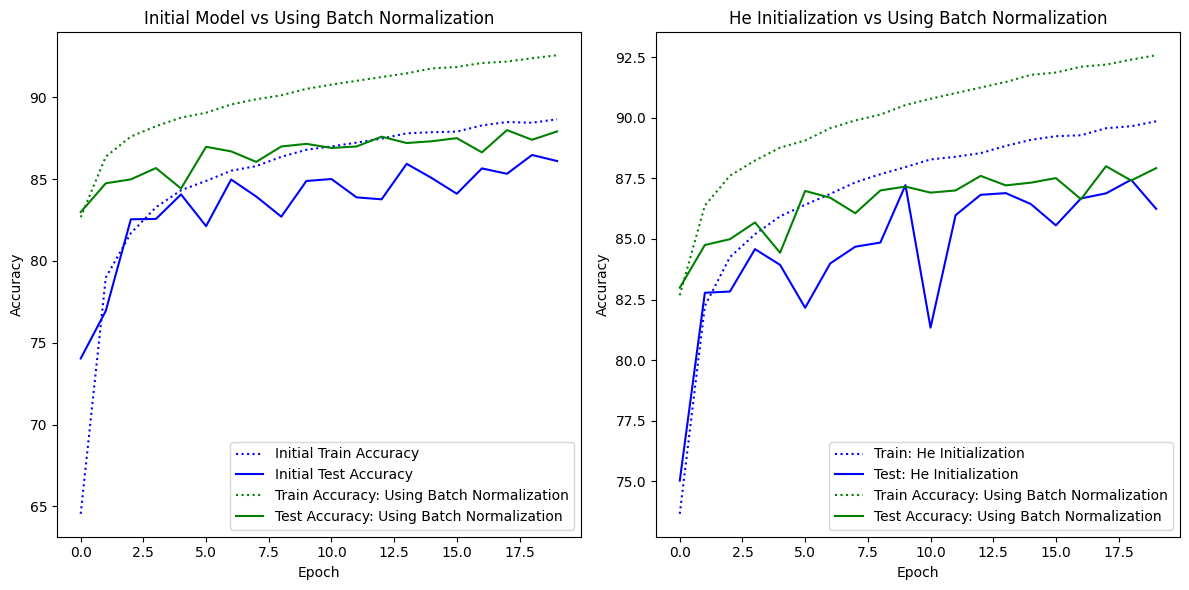

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first plot on the first subplot (axes[0])
axes[0].plot(m_train_acc, linestyle=':', color='blue', label='Initial Train Accuracy')
axes[0].plot(m_test_acc, linestyle='-', color='blue', label='Initial Test Accuracy')
axes[0].plot(bn_train_acc, linestyle=':', color='green', label='Train Accuracy: Using Batch Normalization')
axes[0].plot(bn_test_acc, linestyle='-', color='green', label='Test Accuracy: Using Batch Normalization')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Initial Model vs Using Batch Normalization')
axes[0].legend()

# Plotting the second plot on the second subplot (axes[1])
axes[1].plot(n_train_acc, linestyle=':', color='blue', label='Train: He Initialization')
axes[1].plot(n_test_acc, linestyle='-', color='blue', label='Test: He Initialization')
axes[1].plot(bn_train_acc, linestyle=':', color='green', label='Train Accuracy: Using Batch Normalization')
axes[1].plot(bn_test_acc, linestyle='-', color='green', label='Test Accuracy: Using Batch Normalization')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('He Initialization vs Using Batch Normalization')
axes[1].legend()

plt.tight_layout()
plt.show()


In [23]:
print("Initial model vs Batch normalized")
print(max(m_train_acc))
print(max(bn_train_acc))
print(max(m_test_acc))
print(max(bn_test_acc))

print("He Initialization vs Batch normalized")
print(max(n_train_acc))
print(max(bn_train_acc))
print(max(n_test_acc))
print(max(bn_test_acc))

Initial model vs Batch normalized
88.665
92.57666666666667
86.48
88.0
He Initialization vs Batch normalized
89.85166666666666
92.57666666666667
87.44
88.0


Observations:

The model using Batch normalization is trained faster than both the inital model as well the one using He initilaization. In addition it performs better compared to both the models on test the set with a accuracy of 88.58%

### 9. In the first lab assignment, use ReLU activation (in the hidden layers) but allow the weights to be automatically initialized by pytorch linear module. Deploy drop-out in every hidden layer. Retain/drop probabilities may be chosen by trial and error. Does the model perform better?

In [46]:
# Defining a simple neural network using nn.Module
class DONeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten() # used to convert the image to a vector to pass to the model
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,10)
    )

  # Forward Propagation
  def forward(self, x):
    # flatten the input image
    x = self.flatten(x)

    # pass the resultant vector through linear_relu_stack
    logits = self.linear_relu_stack(x)
    return logits

# create an instance of NeuralNetwork
DOmodel = DONeuralNetwork()

In [47]:
learning_rate = 1e-1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DOmodel.parameters(), lr=learning_rate)

epochs = 50
do_train_acc = []
do_test_acc = []

for t in range(epochs):
    print(f"Epoch {t+1}\n========================================")
    do_train_acc.append(train_loop(train_dataloader, DOmodel, loss_fn, optimizer))
    do_test_acc.append(test_loop(test_dataloader, DOmodel, loss_fn))
print("Done!")
print(do_train_acc)
print(do_test_acc)

Epoch 1
Loss: 2.301177  Processed: 256 / 60000
Loss: 1.049862  Processed: 25856 / 60000
Loss: 0.742968  Processed: 51456 / 60000
Train Error: 
 Accuracy: 58.8%

Test Error: 
 Accuracy: 67.2%, Avg loss: 0.879301 

Epoch 2
Loss: 0.935649  Processed: 256 / 60000
Loss: 0.698791  Processed: 25856 / 60000
Loss: 0.581173  Processed: 51456 / 60000
Train Error: 
 Accuracy: 75.4%

Test Error: 
 Accuracy: 77.3%, Avg loss: 0.642323 

Epoch 3
Loss: 0.668229  Processed: 256 / 60000
Loss: 0.546344  Processed: 25856 / 60000
Loss: 0.523590  Processed: 51456 / 60000
Train Error: 
 Accuracy: 79.6%

Test Error: 
 Accuracy: 78.6%, Avg loss: 0.604718 

Epoch 4
Loss: 0.656105  Processed: 256 / 60000
Loss: 0.592526  Processed: 25856 / 60000
Loss: 0.585876  Processed: 51456 / 60000
Train Error: 
 Accuracy: 81.2%

Test Error: 
 Accuracy: 80.3%, Avg loss: 0.551264 

Epoch 5
Loss: 0.507630  Processed: 256 / 60000
Loss: 0.522819  Processed: 25856 / 60000
Loss: 0.438542  Processed: 51456 / 60000
Train Error: 
 Accu

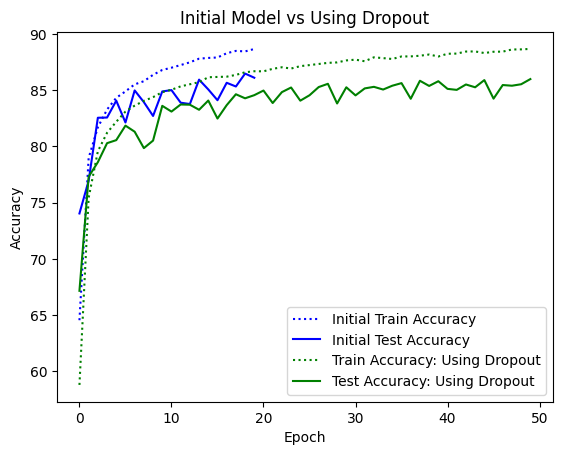

In [48]:
plt.plot(m_train_acc, linestyle=':', color='blue', label='Initial Train Accuracy')
plt.plot(m_test_acc, linestyle='-', color='blue', label='Initial Test Accuracy')
plt.plot(do_train_acc, linestyle=':', color='green', label='Train Accuracy: Using Dropout')
plt.plot(do_test_acc, linestyle='-', color='green', label='Test Accuracy: Using Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Initial Model vs Using Dropout')
plt.legend()
plt.show()

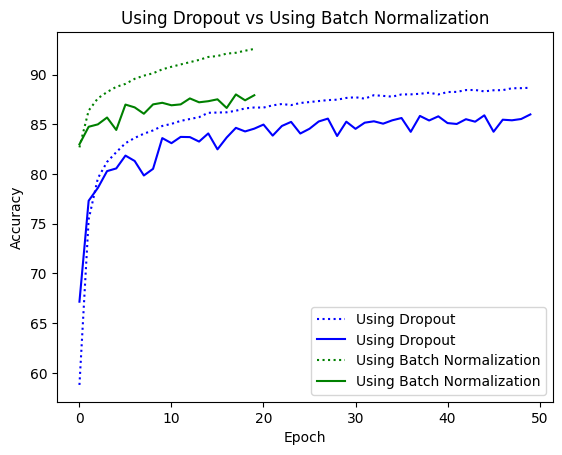

In [49]:
plt.plot(do_train_acc, linestyle=':', color='blue', label='Using Dropout')
plt.plot(do_test_acc, linestyle='-', color='blue', label='Using Dropout')
plt.plot(bn_train_acc, linestyle=':', color='green', label='Using Batch Normalization')
plt.plot(bn_test_acc, linestyle='-', color='green', label='Using Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Using Dropout vs Using Batch Normalization')
plt.legend()
plt.show()

In [50]:
print("Dropout vs Batch normalized")
print(max(do_train_acc))
print(max(bn_train_acc))
print(max(do_test_acc))
print(max(bn_test_acc))

Dropout vs Batch normalized
88.67166666666667
92.57666666666667
85.99
88.0


Observations:

We observe that batch normalization outperformed dropout both in training and testing. We chose dropout prob=0.2. Choosing a large value will mean many nodes dropped out and emperically we witnessed that choosing higher value for p did not give desired result in this case(this could perhaps be because the model itself has fewer nodes). Choosing a very small value for p will mean that we are essentially not dropping any nodes(or dropping negligible number of nodes) and this resulting model will be same as the model we began with. Thus we choose p=0.2 and also increase the number of epochs to see if there is any significant learning happening and the answer turns out to be NO!

### 10. Instead of drop-out, use L2 regularization. Regularization param may be chosen by trial and error. Does the model perform better?

In [30]:
# Defining a simple neural network using nn.Module
class ReNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten() # used to convert the image to a vector to pass to the model

    self.Layer1 = nn.Linear(28*28,64)
    nn.init.kaiming_normal_(self.Layer1.weight, mode='fan_in', nonlinearity='relu')

    self.Layer2 = nn.Linear(64,128)
    nn.init.kaiming_normal_(self.Layer2.weight, mode='fan_in', nonlinearity='relu')

    self.Layer3 = nn.Linear(128,10)
    nn.init.kaiming_normal_(self.Layer3.weight, mode='fan_in', nonlinearity='relu')

    self.linear_relu_stack = nn.Sequential(
        self.Layer1,
        nn.ReLU(),
        self.Layer2,
        nn.ReLU(),
        self.Layer3,
    )

  # Forward Propagation
  def forward(self, x):
    # flatten the input image
    x = self.flatten(x)

    # pass the resultant vector through linear_relu_stack
    logits = self.linear_relu_stack(x)
    return logits

# create an instance of NeuralNetwork
Rmodel = ReNeuralNetwork()

In [31]:
learning_rate = 1e-1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(Rmodel.parameters(), lr=learning_rate, weight_decay=0.0001)

epochs = 20
r_train_acc = []
r_test_acc = []

for t in range(epochs):
    print(f"Epoch {t+1}\n========================================")
    r_train_acc.append(train_loop(train_dataloader, Rmodel, loss_fn, optimizer))
    r_test_acc.append(test_loop(test_dataloader, Rmodel, loss_fn))
print("Done!")
print(r_train_acc)
print(r_test_acc)

Epoch 1
Loss: 2.524912  Processed: 256 / 60000
Loss: 0.687359  Processed: 25856 / 60000
Loss: 0.514561  Processed: 51456 / 60000
Train Error: 
 Accuracy: 74.2%

Test Error: 
 Accuracy: 76.7%, Avg loss: 0.636757 

Epoch 2
Loss: 0.619365  Processed: 256 / 60000
Loss: 0.482292  Processed: 25856 / 60000
Loss: 0.515221  Processed: 51456 / 60000
Train Error: 
 Accuracy: 82.4%

Test Error: 
 Accuracy: 78.9%, Avg loss: 0.545752 

Epoch 3
Loss: 0.427034  Processed: 256 / 60000
Loss: 0.454639  Processed: 25856 / 60000
Loss: 0.471391  Processed: 51456 / 60000
Train Error: 
 Accuracy: 84.2%

Test Error: 
 Accuracy: 84.0%, Avg loss: 0.460196 

Epoch 4
Loss: 0.476820  Processed: 256 / 60000
Loss: 0.425800  Processed: 25856 / 60000
Loss: 0.395498  Processed: 51456 / 60000
Train Error: 
 Accuracy: 85.3%

Test Error: 
 Accuracy: 80.5%, Avg loss: 0.553746 

Epoch 5
Loss: 0.496365  Processed: 256 / 60000
Loss: 0.362601  Processed: 25856 / 60000
Loss: 0.425344  Processed: 51456 / 60000
Train Error: 
 Accu

In [32]:
print("Regularized vs Batch normalized")
print(max(r_train_acc))
print(max(bn_train_acc))
print(max(r_test_acc))
print(max(bn_test_acc))

Regularized vs Batch normalized
89.67833333333334
92.57666666666667
87.01
88.0


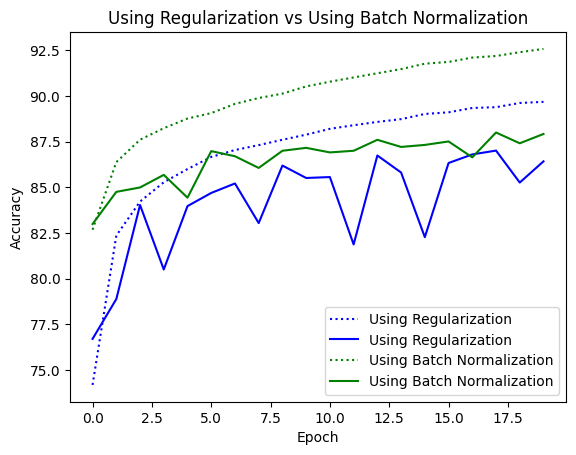

In [34]:
plt.plot(r_train_acc, linestyle=':', color='blue', label='Using Regularization')
plt.plot(r_test_acc, linestyle='-', color='blue', label='Using Regularization')
plt.plot(bn_train_acc, linestyle=':', color='green', label='Using Batch Normalization')
plt.plot(bn_test_acc, linestyle='-', color='green', label='Using Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Using Regularization vs Using Batch Normalization')
plt.legend()
plt.show()

Observations:

We see that batch normalization yielded better test and train accuracies compared to regularization. Choosing a high value for weight_decay did not give good performance, but choosing a small very value for this is also not desirable as the term goes close to zero and the results will be identical to the model we started with.